In [ ]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 100)
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Quad
from datetime import datetime
from math import pi
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
import random
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
t = time()

In [ ]:
# Keras imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv1D, MaxPooling1D, AveragePooling1D, UpSampling1D
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional, TimeDistributed
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils, generic_utils
from sklearn.metrics import f1_score
from keras.models import Model
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras import regularizers
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from weightnorm import data_based_init, AdamWithWeightnorm
from keras.utils import np_utils
import keras.backend as K
from itertools import product
from functools import partial
from keras.layers.noise import GaussianNoise
from keras.layers.advanced_activations import ELU
from keras.constraints import maxnorm
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, merge, add
from keras.models import load_model

Using TensorFlow backend.


In [ ]:
from sklearn import model_selection
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn import cross_validation
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [ ]:
# Import custom scripts and functions
%aimport model_performance_evaluation
%aimport custom_metrics
%aimport data_processing
%aimport make_keras_generators

In [ ]:
# !wget https://dl.dropboxusercontent.com/u/53977633/data/df072717611pm.csv
# !wget https://dl.dropboxusercontent.com/u/53977633/data/X072717611pm.csv
# !wget https://dl.dropboxusercontent.com/u/53977633/data/y072717611pm.csv

In [ ]:
# X = pd.read_csv('/output/X072717611pm.csv')
# X.drop(X.columns[0], inplace=True, axis=1)
# y = pd.read_csv('/output/y072717611pm.csv')
# y.drop(y.columns[0], inplace=True, axis=1)
# df_ohlc_and_rectangles = pd.read_csv('/output/df072717611pm.csv')
# df_ohlc_and_rectangles.drop(df_ohlc_and_rectangles.columns[0], inplace=True, axis=1)

In [ ]:
X = pd.read_csv('floyd-ignore/datasets/X-06.27.17.611pm.csv')
X.drop(X.columns[0], inplace=True, axis=1)
y = pd.read_csv('floyd-ignore/datasets/y-06.27.17.611pm.csv')
y.drop(y.columns[0], inplace=True, axis=1)
df_ohlc_and_rectangles = pd.read_csv('floyd-ignore/datasets/df-06.27.17.611pm.csv')
df_ohlc_and_rectangles.drop(df_ohlc_and_rectangles.columns[0], inplace=True, axis=1)

In [ ]:
# Save data into backup X, y so we don't have to reload it 

X_backup = X
y_backup = y

# Conv1D with residual layers

In [ ]:
#model = load_model('bc_conv_residual_w_dropout-jun27-401pm.h5', custom_objects={'AdamWithWeightnorm': AdamWithWeightnorm, 'fbeta_score': custom_metrics.fbeta_score, 'recall': custom_metrics.recall, 'precision': custom_metrics.precision})

In [ ]:
#preds, y_preds_proba = model_performance_evaluation.eval(model, X_train, y_train, sensitivity=0.325, weights='bc_conv_residual_w_dropout-jun27-401pm.hdf5',  binary=1)

In [ ]:
# # For lining up predictions and labels
# df_predictions = pd.DataFrame(preds.astype(int))
# df_pred_test_compare = pd.concat([df_predictions, pd.DataFrame(y_train).reset_index()], 
#                          axis=1, 
#                          ignore_index=True)  
# df_pred_test_compare.columns=['predicted', 'idx', 'true']

## Train models for Proximal and Distal matching

##### Prepare data for Distal specific model training

In [23]:
# Make list of features and label column names
features = [col for col in list(X)]
labels = [col for col in list(y) if col.startswith('Distal')]

# Select only rows that contain zones
df_zones = df_ohlc_and_rectangles.loc[df_ohlc_and_rectangles['rectangle_here'] == 1]

# Split out the new df into features and labels
df_X = df_zones[features]
df_y = df_zones[labels]

%aimport data_processing
# Drop features from X

features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      #'O', 'H', 'L', 'C', 
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      'rectangle_here', 'supply_demand', 'group']


df_X = data_processing.drop_non_features(df_X, features_to_remove, zero_columns=1)
df_y = data_processing.drop_non_features(df_y, ['Distal'], zero_columns=1)

In [24]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.05, random_state=0)
# Create validation split from training
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05, random_state=0)

y_train_distal = data_processing.distal_split(y_train)
y_valid_distal = data_processing.distal_split(y_valid)
y_test_distal = data_processing.distal_split(y_test)

print(y_train_distal.shape)
print(y_test_distal.shape)
print(y_valid_distal.shape)

(6706, 48)
(372, 48)
(353, 48)


In [25]:
# Create minmax scaled data for later
# SCALE EACH FEATURE INTO [0, 1] RANGE
sX_train = minmax_scale(X_train, axis = 0)
sX_valid = minmax_scale(X_valid, axis = 0)
sX_test = minmax_scale(X_test, axis = 0)

In [26]:
# Stack to 3dim for conv net
X_train = data_processing.X_to_Conv1D_arrays(X_train)
X_valid = data_processing.X_to_Conv1D_arrays(X_valid)
X_test = data_processing.X_to_Conv1D_arrays(X_test)

# Stack minmax scaled to 3dim for autoencoder
sX_train = data_processing.X_to_Conv1D_arrays(sX_train)
sX_valid = data_processing.X_to_Conv1D_arrays(sX_valid)
sX_test = data_processing.X_to_Conv1D_arrays(sX_test)

X:  (6706, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (353, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (372, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (6706, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (353, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (372, 84, 1)
X:  <class 'numpy.ndarray'>


#### Autoencoder for dimensionality reduction

In [27]:
n_original_features = len(list(df_X))
print( "Original n of features:", n_original_features)

# Load the encoder model
encoder = load_model('conv1d-encoder-jun30.h5', custom_objects={'AdamWithWeightnorm': AdamWithWeightnorm, 'fbeta_score': custom_metrics.fbeta_score, 'recall': custom_metrics.recall, 'precision': custom_metrics.precision})

# Add a Conv1D layer to the end
x = Conv1D(1, 3, name='back_to_3D')(encoder.layers[-1].output)
encoder_model_input = encoder.input
encoder = Model(input=encoder_model_input, output=[x])
#encoder.summary()

# Dimensionality reduction
X_train_ae = encoder.predict(sX_train)
X_valid_ae = encoder.predict(sX_valid)
X_test_ae = encoder.predict(sX_test)

print( "Autoencoded features:", X_train_ae.shape[1])

X_train = np.concatenate((X_train, X_train_ae), axis=1)
X_valid = np.concatenate((X_valid, X_valid_ae), axis=1)
X_test = np.concatenate((X_test, X_test_ae), axis=1)

Original n of features: 84


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.


Autoencoded features: 40


In [28]:
# Create generators
batch_size = 16
train_gen = make_keras_generators.train_generator(X_train, y_train_distal.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid_distal.values, batch_size)

#### Train Conv1D model for Distal line

In [29]:
input_shape = X_train.shape[1:3]
output_shape = len(list(y_train))
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1

dict_keys(['lr', 'fbeta_score', 'val_loss', 'recall', 'val_fbeta_score', 'acc', 'val_recall', 'loss', 'precision', 'val_precision', 'val_acc'])


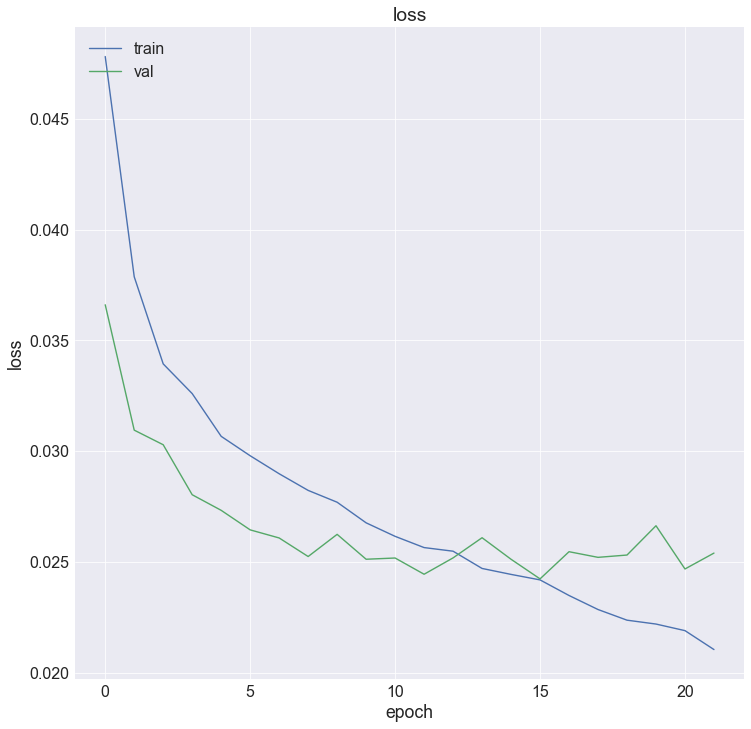

In [95]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['lr', 'fbeta_score', 'val_loss', 'recall', 'val_fbeta_score', 'acc', 'val_recall', 'loss', 'precision', 'val_precision', 'val_acc'])


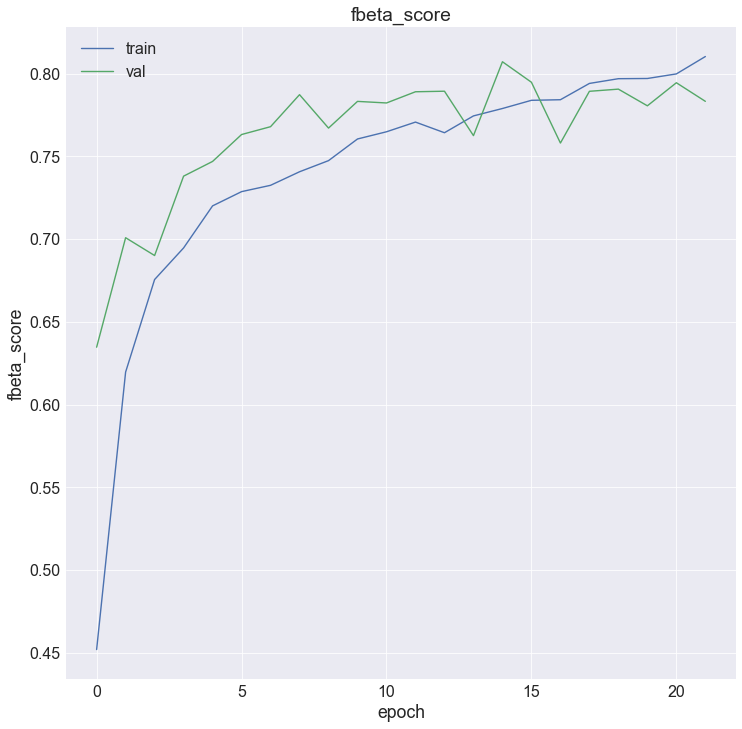

In [96]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Train LSTM model for Proximal matching

##### Prepare data for Proximal specific matching

In [10]:
# Reset X and y

X = X_backup
y = y_backup

In [11]:

# Make list of features and label column names
features = [col for col in list(X)]

# Add distal predictions, cause we'll always have the Distal as well
#distals = [col for col in list(y) if col.startswith('Distal')]
#features.extend(distals)

labels = [col for col in list(y) if col.startswith('Proximal')]

# Select only rows that contain zones
df_zones = df_ohlc_and_rectangles.loc[df_ohlc_and_rectangles['rectangle_here'] == 1]

# Split out the new df into features and labels
df_X = df_zones[features]
df_y = df_zones[labels]

%aimport data_processing
# Drop features from X

features_to_remove = ['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start', 'L_diff_0', 'O_diff_0',
                      'Epoch Date End', 'Proximal', 'Distal', 'change', 'V_diff_0', 'C_diff_0', 'H_diff_0',
                      #'O', 'H', 'L', 'C', 
                      'csv_origin_tag', 'range_high_close_range_0', 'change_open_close', 'range_high_close', 
                      'rectangle_here', 'supply_demand', 'group']


df_X = data_processing.drop_non_features(df_X, features_to_remove, zero_columns=1)
df_y = data_processing.drop_non_features(df_y, ['Proximal'], zero_columns=1)

# Remove all columns that only contain 0s
print(df_X.shape)

# Clean up duplicate labels (i.e. where multiple matches were found)
df_y = df_y.apply(lambda x:x.drop_duplicates(), axis=1).fillna(False)

print(df_y.shape)

(7431, 84)
(7431, 42)


##### Compute class_weights and sample_weights

In [12]:
# Create a series that represents the true class (which match) of each one-hot encoded row
y_classes = df_y.idxmax(1, skipna=False)

In [13]:
print("Number of unique classes in our integer based categorical labels:", len(np.unique(y_classes)))

Number of unique classes in our integer based categorical labels: 42


In [14]:
print("Number of columns in our df_y:", np.unique(list(df_y)).shape)

Number of columns in our df_y: (42,)


In [15]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
le = LabelEncoder()
# Fit the label encoder to our label series
le.fit(list(y_classes))
# Create integer based labels Series
y_integers = le.transform(list(y_classes))

In [16]:
y_integers

array([26, 26, 26, ..., 26, 26, 26])

In [17]:
# Create dict of labels : integer representation
labels_and_integers = dict(zip(y_classes, y_integers))

In [18]:
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight

class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
sample_weights = compute_sample_weight('balanced', y_integers)

In [19]:
class_weights_dict = dict(zip(le.transform(list(le.classes_)), class_weights))

##### Prepare data for Keras

In [20]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=0)
# Create validation split from training
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.05, random_state=0)

y_train_proximal = data_processing.proximal_split(y_train)
y_valid_proximal = data_processing.proximal_split(y_valid)
y_test_proximal = data_processing.proximal_split(y_test)

print(y_train_proximal.shape)
print(y_test_proximal.shape)
print(y_valid_proximal.shape)

(6352, 42)
(744, 42)
(335, 42)


In [21]:
# Create minmax scaled data for later autoencoder features
# SCALE EACH FEATURE INTO [0, 1] RANGE
sX_train = minmax_scale(X_train, axis = 0)
sX_valid = minmax_scale(X_valid, axis = 0)
sX_test = minmax_scale(X_test, axis = 0)

In [22]:
# Stack to 3dim for conv net
X_train = data_processing.X_to_Conv1D_arrays(X_train)
X_valid = data_processing.X_to_Conv1D_arrays(X_valid)
X_test = data_processing.X_to_Conv1D_arrays(X_test)

# Stack minmax scaled to 3dim for autoencoder
sX_train = data_processing.X_to_Conv1D_arrays(sX_train)
sX_valid = data_processing.X_to_Conv1D_arrays(sX_valid)
sX_test = data_processing.X_to_Conv1D_arrays(sX_test)

X:  (6352, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (335, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (744, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (6352, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (335, 84, 1)
X:  <class 'numpy.ndarray'>
X:  (744, 84, 1)
X:  <class 'numpy.ndarray'>


In [23]:
n_original_features = len(list(df_X))
print( "Original n of features:", n_original_features)

# Load the encoder model
encoder = load_model('conv1d-encoder-jun30.h5', custom_objects={'AdamWithWeightnorm': AdamWithWeightnorm, 'fbeta_score': custom_metrics.fbeta_score, 'recall': custom_metrics.recall, 'precision': custom_metrics.precision})

# Add a Conv1D layer to the end
x = Conv1D(1, 3, name='back_to_3D')(encoder.layers[-1].output)
encoder_model_input = encoder.input
encoder = Model(input=encoder_model_input, output=[x])
#encoder.summary()

# Dimensionality reduction
X_train_ae = encoder.predict(sX_train)
X_valid_ae = encoder.predict(sX_valid)
X_test_ae = encoder.predict(sX_test)

print( "Autoencoded features:", X_train_ae.shape[1])

X_train = np.concatenate((X_train, X_train_ae), axis=1)
X_valid = np.concatenate((X_valid, X_valid_ae), axis=1)
X_test = np.concatenate((X_test, X_test_ae), axis=1)

print( "Autoencoded features + original features:", X_train.shape[1])

Original n of features: 84


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.


Autoencoded features: 40
Autoencoded features + original features: 124


In [24]:
X_train.shape

(6352, 124, 1)

In [25]:
# Create generators
batch_size = 64
train_gen = make_keras_generators.train_generator(X_train, y_train_proximal.values, batch_size)
valid_gen = make_keras_generators.valid_generator(X_valid, y_valid_proximal.values, batch_size)

In [26]:
input_shape = X_train.shape[1:3]

output_shape = len(list(y_train))
validation_steps = int(len(X_valid)/batch_size)+1
steps_per_epoch = int(len(X_train)/batch_size)+1

In [27]:
# Don't over-weight the rare classes
class_weights_dict_reduce = class_weights_dict
for the_key, the_value in class_weights_dict_reduce.items():
    if the_value >= 88:
        #print(the_key, the_value)
        class_weights_dict_reduce[the_key] = float(1.0)

In [57]:
print(list(y_test_proximal)[3],
list(y_test_proximal)[23],
list(y_test_proximal)[26])

Proximal_match_-1_O Proximal_match_0_C Proximal_match_0_O


In [59]:
y_test_proximal_ = y_test_proximal[['Proximal_match_-1_O','Proximal_match_0_C', 'Proximal_match_0_O']]

In [67]:
proximal_model = load_model('proximal-lstm-july5-1232am-mc.h5', custom_objects={'AdamWithWeightnorm': AdamWithWeightnorm, 'fbeta_score': custom_metrics.fbeta_score, 'recall': custom_metrics.recall, 'precision': custom_metrics.precision})

InternalError: Dst tensor is not initialized.
	 [[Node: bidirectional_3_3/forward_lstm_3/random_uniform/min = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [] values: -0.038268607>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'bidirectional_3_3/forward_lstm_3/random_uniform/min', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-67-6799de30622d>", line 1, in <module>
    proximal_model = load_model('proximal-lstm-july5-1232am-mc.h5', custom_objects={'AdamWithWeightnorm': AdamWithWeightnorm, 'fbeta_score': custom_metrics.fbeta_score, 'recall': custom_metrics.recall, 'precision': custom_metrics.precision})
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/models.py", line 240, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/models.py", line 304, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/layers/__init__.py", line 54, in deserialize
    printable_module_name='layer')
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/utils/generic_utils.py", line 140, in deserialize_keras_object
    list(custom_objects.items())))
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/models.py", line 1203, in from_config
    model.add(layer)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/models.py", line 433, in add
    layer(x)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/engine/topology.py", line 558, in __call__
    self.build(input_shapes[0])
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/layers/wrappers.py", line 293, in build
    self.forward_layer.build(input_shape)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/layers/recurrent.py", line 990, in build
    constraint=self.kernel_constraint)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/legacy/interfaces.py", line 88, in wrapper
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/engine/topology.py", line 391, in add_weight
    weight = K.variable(initializer(shape), dtype=dtype, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/initializers.py", line 208, in __call__
    dtype=dtype, seed=self.seed)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 3379, in random_uniform
    dtype=dtype, seed=seed)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/random_ops.py", line 230, in random_uniform
    minval = ops.convert_to_tensor(minval, dtype=dtype, name="min")
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 637, in convert_to_tensor
    as_ref=False)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 702, in internal_convert_to_tensor
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/constant_op.py", line 110, in _constant_tensor_conversion_function
    return constant(v, dtype=dtype, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/constant_op.py", line 103, in constant
    attrs={"value": tensor_value, "dtype": dtype_value}, name=name).outputs[0]
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Dst tensor is not initialized.
	 [[Node: bidirectional_3_3/forward_lstm_3/random_uniform/min = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [] values: -0.038268607>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [ ]:
proximal_model.layers.pop()
proximal_model.summary()

In [ ]:
output_shape = len(list(y_test_proximal_))

In [ ]:
x = Dropout(0.2)(proximal_model.layers[-1].output)
x = Dense(output_shape)(x)
x = Activation('softmax', name='final_activation_layer')(x)

proximal_model_input = proximal_model.input
proximal_model = Model(input=proximal_model_input, output=[x])
proximal_model.summary()

In [ ]:
preds, preds_proba, pred_classes = model_performance_evaluation.eval(proximal_model, X_test, y_test_proximal_, batch_size=8,
                                                         temperature=0.8,
                                                         #weights='bc_conv_residual_w_dropout-jun27-401pm.hdf5', 
                                                        sequential=0,
                                                         binary=0)

In [119]:
proximal_model.save('proximal-lstm-july3-9947pm-150epochs.h5')

dict_keys(['val_fbeta_score', 'recall', 'precision', 'val_precision', 'loss', 'val_recall', 'val_loss', 'acc', 'fbeta_score', 'val_acc'])


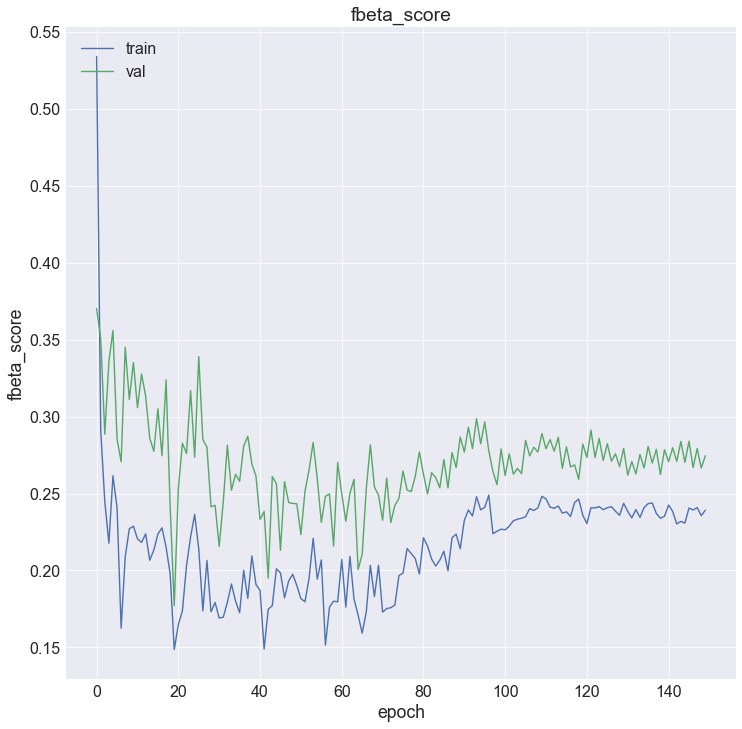

In [139]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['fbeta_score'])
plt.plot(history.history['val_fbeta_score'])
plt.title('fbeta_score')
plt.ylabel('fbeta_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

dict_keys(['val_fbeta_score', 'recall', 'precision', 'val_precision', 'loss', 'val_recall', 'val_loss', 'acc', 'fbeta_score', 'val_acc'])


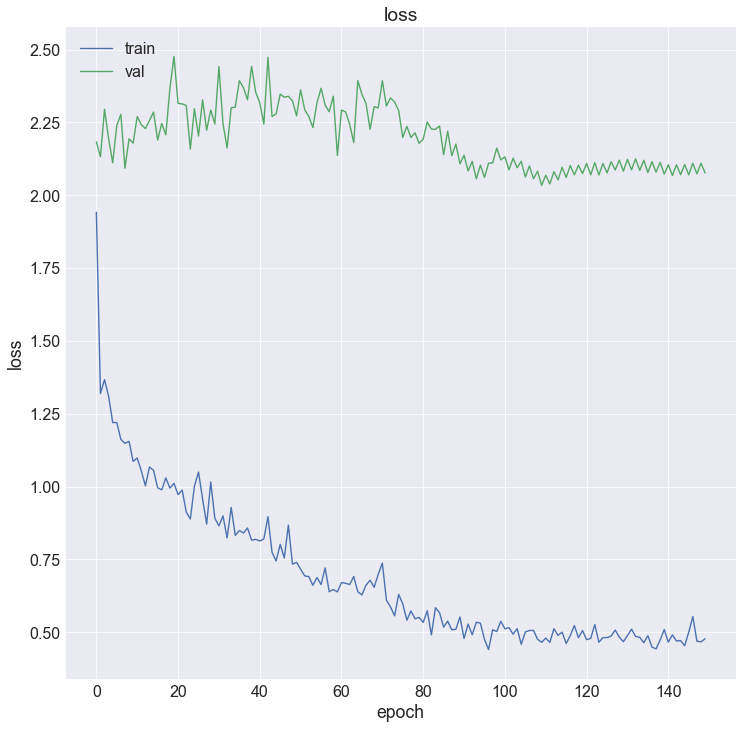

In [140]:
sns.set_context("paper", font_scale=2)
plt.figure(figsize=(12, 12))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Make predictions on raw data and visualize

In [8]:
data = ['USDJPY1440.csv']

In [10]:
# allows us to easily modify how many days ahead and before we look:
lookforward = 4 # how many days we look forward
lookback = 7 # how many days we look back

        
# Choose features to be used in feature generation function
feature_generation_channels = ["O", "H", "L", "C", "V"] 

X_, y_, df_ohlc_and_rectangles, groups,\
groups_count, scalers, groups_dict,\
scaled_columns, df_data_unscaled,\
y_rects, proximal_columns, distal_columns = data_processing.prepare_data(data, 
                                                                 lookforward, 
                                                                 lookback,
                                                                 feature_generation_channels,
                                                                 lag=0,
                                                                 change_open_close=1, 
                                                                 range_high_low=1,
                                                                 rolling_mean_range_HL=1,
                                                                 range_high_close=1,
                                                                 std_dev=1,
                                                                 rolling_mean=1,
                                                                 change_open_close_shift=1,
                                                                 range_high_low_shift=0,
                                                                 range_high_close_shift=1,
                                                                 diff_shift=1,
                                                                 rolling_mean_shift=1,
                                                                 std_dev_shift=1,
                                                                 center=True
                                                                )

Processing:  USDJPY1440.csv Number  1  of  1
We now have: (0, 0) rows of data!
Reading in Date, OHLCV, Supply/Demand
Renaming df_ohlc column headers for clarity
Reading in Rectangle data
Renaming df_rects column headers for clarity
Identifying supply/demand with supply_or_demand func: USDJPY1440.csv (2681, 12)
~~~
Identifying zone ends with zone_ender func: USDJPY1440.csv (2681, 14)
~~~
Your df_norm columns: Index(['O', 'H', 'L', 'C', 'V'], dtype='object')
Your df_non_norm columns: Index(['Epoch Date', 'Supply/Demand', 'Object Name', 'Epoch Date Start',
       'Epoch Date End', 'Proximal', 'Distal', 'supply_demand',
       'rectangle_here', 'Proximal_match_-6_O',
       ...
       'Distal_match_-4_C', 'Distal_match_-3_C', 'Distal_match_-2_C',
       'Distal_match_-1_C', 'Distal_match_0_C', 'Distal_match_1_C',
       'Distal_match_2_C', 'Distal_match_3_C', 'Distal_match_4_C',
       'Distal_match_5_C'],
      dtype='object', length=105)
Generating features:  Difference between open and 

/Users/production204/Github/the-internet-of-forex/data_processing.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["change_open_close"] = df_data["O"] - df_data["C"] # add change column, difference between open and close
/Users/production204/Github/the-internet-of-forex/data_processing.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_low"] = df_data["H"] - df_data["L"] # add range, difference between high and low


(2681, 7)
~~~
Generating features:  Range between high and low
Shape is now: (2681, 8)
~~~


/Users/production204/Github/the-internet-of-forex/data_processing.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data["range_high_close"] = df_data["H"] - df_data["C"] # add range, difference between high and low
/Users/production204/Github/the-internet-of-forex/data_processing.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_data[label] =  df_data[each].rolling(window=6).std()
/Users/production204/Github/the-internet-of-forex/data_processing.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Generating features:  Change over time for lookforward/lookback range
Generating features:  Range High-Close over time for lookforward/lookback range
Generating features:  Diffs over time for lookforward/lookback range
Generating features:  Rolling mean for yesterday, today, tomorrow range
Generating features:  Std deviation for yesterday, today, tomorrow range
Your df_scale_with_PCA: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 1

In [ ]:
X_ = data_processing.drop_non_features(X_, features_to_remove, zero_columns=1)

In [ ]:
y_ = y_['rectangle_here']

In [ ]:
X_array, y_array = data_processing.to_Conv2D_arrays(X_,y_)

In [ ]:
preds, pred_classes, y_pred_proba = model_performance_evaluation.eval(conv, X_array, y_array, binary=1, keras=1)

In [ ]:
test_data

In [ ]:
# For lining up predictions and data
#df_predictions = pd.DataFrame(preds.astype(int))
df_pred_OHLC = pd.concat([preds, 
                          pd.DataFrame(df_data_unscaled[['O', 'H', 'L', 'C']]).reset_index(drop=True)], 
                         axis=1, 
                         ignore_index=True)  
df_pred_OHLC.columns=['predicted', 'O', 'H', 'L','C']  

In [ ]:
df_pred_OHLC

## Visualize preds and OHLC

In [6]:
df = df_data_unscaled

NameError: name 'df_data_unscaled' is not defined

In [7]:
import zigzag as zigzag

In [ ]:
# Convert Dates to datetime
df["Epoch Date"] = pd.to_datetime(df["Epoch Date"], unit='s')
df["Epoch Date Start"] = pd.to_datetime(df["Epoch Date Start"], unit='s')
df["Epoch Date End"] = pd.to_datetime(df["Epoch Date End"], unit='s')

w = 12*60*60*1000 # half day in ms

TOOLS = "pan,xwheel_zoom,wheel_zoom,box_zoom,reset,save"
p = figure(x_axis_type="datetime", tools=TOOLS, plot_height=500, 
           plot_width=1200, title="🍩", active_scroll='xwheel_zoom')
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.5

p.segment(df['Epoch Date'], df.H, df['Epoch Date'], df.L, color="black")
p.vbar(df['Epoch Date'], w, df.O, df.C)

# Add Rectangle data
df_sp = df.dropna(subset=['Supply/Demand'])

source_supply = ColumnDataSource(df_sp.loc[df_sp['Supply/Demand']=='SUPPLY', :])
rect_supply = Quad(left="Epoch Date Start", top="Proximal", right="Epoch Date End", bottom="Distal", fill_color="firebrick", line_alpha=0.2, fill_alpha=0.2) 
p.add_glyph(source_supply, rect_supply)

source_demand = ColumnDataSource(df_sp.loc[df_sp['Supply/Demand']=='DEMAND', :])
rect_demand = Quad(left="Epoch Date Start", top="Proximal", right="Epoch Date End", bottom="Distal", fill_color="steelblue", line_alpha=0.2, fill_alpha=0.2)
p.add_glyph(source_demand, rect_demand)


output_file("candlestick.html", title="candlestick data SPC test")
show(p)  # open a browser

In [44]:
from random import random
from numpy import array
from numpy import cumsum

In [50]:
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

In [51]:
X, y = get_sequence(50)
print(X.shape)
#print(y)

(1, 50, 1)


In [53]:
print(X_train.shape)

(6352, 124, 1)
